In [119]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing

In [129]:
# Read data
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/True.csv")

In [130]:
# Add target variable depending on fake/true
fake['target'] = 'fake'
true['target'] = 'real'

# Concat dataframes to one
data = pd.concat([fake, true]).reset_index(drop=True)
print(data.shape)
data.sample(5)


(44898, 5)


,title,text,subject,date,target
22997,Request to Halt Construction of DAPL Declined,21st Century Wire says A request by Native Ame...,Middle-east,"February 13, 2017",fake
37210,Nasralla practically assured of Honduras elect...,TEGUCIGALPA (Reuters) - With 70 percent of bal...,worldnews,"November 27, 2017",real
27791,"Russia, before Tillerson visit, says worried U...",MOSCOW (Reuters) - Russia said it hoped forthc...,politicsNews,"April 11, 2017",real
36538,U.N. pushing sharp increase in migrant returns...,TUNIS (Reuters) - The United Nations migration...,worldnews,"December 5, 2017",real
7349,"GOP Governor Blocks Minimum Wage Increase, Gi...","In February 2016, the city of Birmingham, Alab...",News,"March 22, 2016",fake


We will try to format the `date` feature as a `datetime64[ns]` in order to easily access the day, month, year of a certain date.

In [131]:
# Kudos to John Clements: https://stackoverflow.com/a/23581184
def try_parsing_date(text):
    text = text.strip()
    for fmt in ("%B %d, %Y", "%B %d, %Y", "%d-%b-%y", "%b %d, %Y"):
        try:
            return datetime.datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

I found that sometimes there's a link or text in the `date` column. These are filtered out manually below.

In [132]:
data = data.loc[lambda x: ~x.date.str.contains("|".join(["https", "Video"]))]
data['date'] = [try_parsing_date(date) for date in data['date']]
data.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
target             object
dtype: object

# Exploration

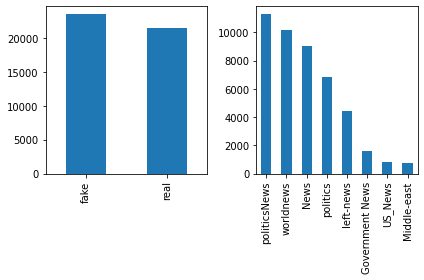

In [143]:
fig, ax = plt.subplots(1,2)
data['target'].value_counts().plot.bar(ax=ax[0]);
data['subject'].value_counts().plot.bar(ax=ax[1]);
fig.tight_layout()

In [145]:
data.groupby(["date", "target"]).count()

,,title,text,subject
date,target,,,
2015-03-31,fake,8,8,8
2015-04-01,fake,2,2,2
2015-04-02,fake,1,1,1
2015-04-04,fake,5,5,5
2015-04-05,fake,13,13,13
...,...,...,...,...
2018-02-15,fake,9,9,9
2018-02-16,fake,8,8,8
2018-02-17,fake,7,7,7
